In [2]:
import math
import warnings

from IPython.display import display
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [3]:
df=pd.read_csv('employee-compensation.csv')
df.head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2013,1,Public Protection,FIR,FIR Fire Department,798.000,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,...,37216,123841.280,76853.770,14922.050,215617.100,24574.980,14920.130,3589.870,43084.980,258702.080
1,Fiscal,2014,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,261.000,"Laborers, Local 261",7500,Semi-Skilled & General Labor,...,24950,61137.600,7341.040,9218.740,77697.380,14897.710,12516.700,6117.990,33532.400,111229.780
2,Fiscal,2016,2,"Public Works, Transportation & Commerce",AIR,AIR Airport Commission,790.000,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",...,27447,41192.820,0.000,390.000,41582.820,6996.410,11308.960,3200.690,21506.060,63088.880
3,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,253.000,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,...,42001,66993.680,26633.830,4494.980,98122.490,21231.910,13417.450,7449.630,42098.990,140221.480
4,Fiscal,2013,2,"Public Works, Transportation & Commerce",DPW,DPW GSA - Public Works,21.000,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,...,22142,74260.800,0.000,0.000,74260.800,13522.950,11989.390,5977.190,31489.530,105750.330


## Preparing the Dataset

In [4]:
corr_matrix = df.corr()
print(corr_matrix)

                          Year  Organization Group Code  Union Code  \
Year                     1.000                   -0.002      -0.000   
Organization Group Code -0.002                    1.000      -0.007   
Union Code              -0.000                   -0.007       1.000   
Employee Identifier      0.001                   -0.007       0.003   
Salaries                 0.036                   -0.209      -0.065   
Overtime                 0.025                   -0.302       0.061   
Other Salaries          -0.009                   -0.227       0.166   
Total Salary             0.035                   -0.276      -0.019   
Retirement               0.000                   -0.243      -0.081   
Health/Dental            0.047                   -0.231      -0.085   
Other Benefits           0.055                    0.024      -0.286   
Total Benefits           0.027                   -0.202      -0.138   
Total Compensation       0.034                   -0.263      -0.049   

     

In [48]:
data=df.loc[:, ['Salaries', 'Overtime', 'Health/Dental', 'Total Benefits', 'Total Compensation']]
corr_matrix_data = data.corr()
print(corr_matrix_data)

                    Salaries  Overtime  Health/Dental  Total Benefits  \
Salaries               1.000     0.270          0.777           0.939   
Overtime               0.270     1.000          0.310           0.286   
Health/Dental          0.777     0.310          1.000           0.889   
Total Benefits         0.939     0.286          0.889           1.000   
Total Compensation     0.973     0.453          0.808           0.944   

                    Total Compensation  
Salaries                         0.973  
Overtime                         0.453  
Health/Dental                    0.808  
Total Benefits                   0.944  
Total Compensation               1.000  


In [49]:
data=df.loc[:, ['Salaries','Health/Dental','Total Benefits','Total Compensation']]
corr_matrix_data = data.corr()
print(corr_matrix_data)

                    Salaries  Health/Dental  Total Benefits  \
Salaries               1.000          0.777           0.939   
Health/Dental          0.777          1.000           0.889   
Total Benefits         0.939          0.889           1.000   
Total Compensation     0.973          0.808           0.944   

                    Total Compensation  
Salaries                         0.973  
Health/Dental                    0.808  
Total Benefits                   0.944  
Total Compensation               1.000  


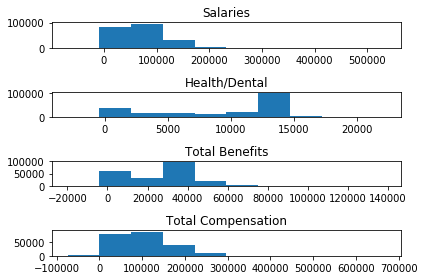

In [51]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=False, sharey=False)

plt.plot(figsize=(30,30))

ax1.hist(data['Salaries'])
ax1.set_title('Salaries')

ax2.hist(data['Health/Dental'])
ax2.set_title('Health/Dental')

ax3.hist(data['Total Benefits'])
ax3.set_title('Total Benefits')

ax4.hist(data['Total Compensation'])
ax4.set_title('Total Compensation')

f.tight_layout()

In [52]:
x=data.loc[:,['Salaries','Health/Dental','Total Benefits']]
y=data.loc[:,['Total Compensation']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=111)

## OLS Regression

In [53]:
from sklearn import linear_model

lm=linear_model.LinearRegression()
lm.fit(x_train, y_train)

print('Train_Regression:', lm.score(x_train, y_train))
print('Test_Regression:', lm.score(x_test, y_test))

Train_Regression: 0.9547473218555901
Test_Regression: 0.9548723595261789


In [54]:
#import statsmodels.formula.api as smf
#data=x_train.join(y_train)
#data1='Total Compensation ~ Total Salaries+Health/Dental+Total Benefits'
#lf= data1
#lm=smf.ols(formula=lf,data=data).fit()
#print(lm.summary())
#print('Coefficients:\n', lf.params)
#print('\nP-values:\n', lf.pvalues)
#print('\nR-squared:\n', lf.rsquared)
#lf.conf_int()

## KNN Regression Model

In [36]:
from sklearn import neighbors
knn_1 = neighbors.KNeighborsRegressor(n_neighbors=1)
knn_1.fit(x_train, y_train)
print('Train:', knn_1.score(x_train, y_train))
print('Test:', knn_1.score(x_test, y_test))

Train: 0.9931564551483912
Test: 0.9610668616736654


In [37]:
knn_5 = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5.fit(x_train, y_train)
print('Train:', knn_5.score(x_train, y_train))
print('Test:', knn_5.score(x_test, y_test))

Train: 0.9848567628548438
Test: 0.9773316257916971


In [38]:
knn_5w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_5w.fit(x_train, y_train)
print('Train:', knn_5w.score(x_train, y_train))
print('Test:', knn_5w.score(x_test, y_test))

Train: 0.9989742013960404
Test: 0.9774516721292563


Above are KNN Regressions with K as 1, 5, and dist-weighted 5. All test outcomes are similar to the training sets, suggesting the model does not appear to overfit. Scores of KNN also slightly higher than OLS Regression. 